[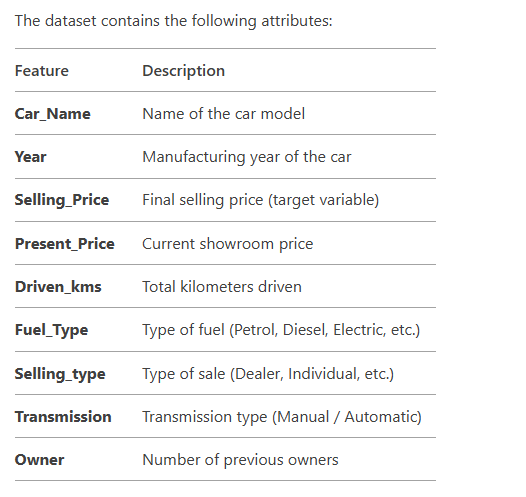](http://)

[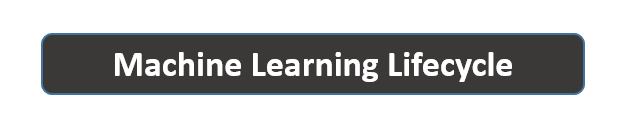](http://)

[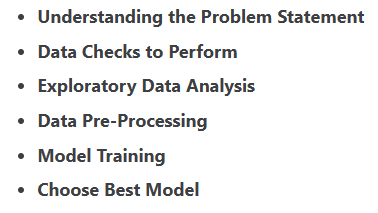](http://)

 # Import Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [ ]:
import os
os.listdir('/kaggle/input/')

['car data.csv']

In [ ]:
df = pd.read_csv('../input/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
#Check statistics of data set
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Check and Transforming

In [7]:
# Check null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
# check duplication
df.duplicated().sum()

2

In [9]:
# drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
# checking the distribution of categorical data
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Data Visualization

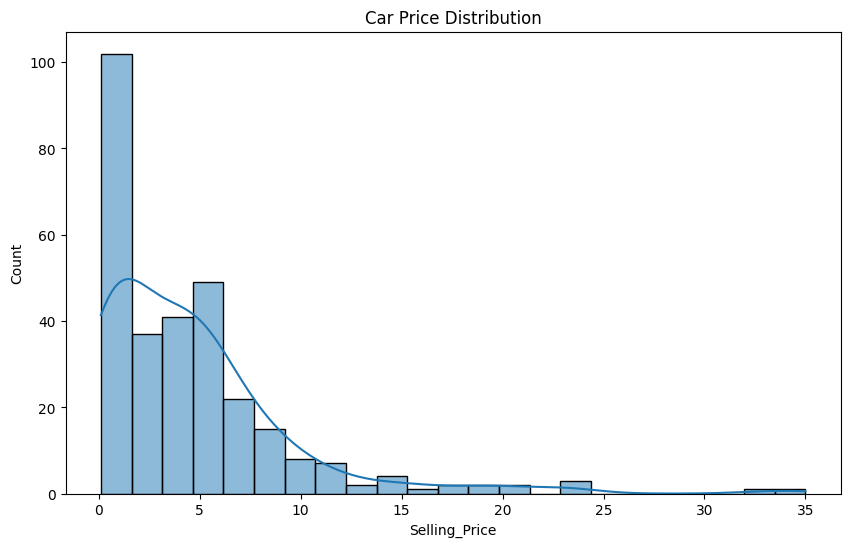

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Car Price Distribution')
plt.show()

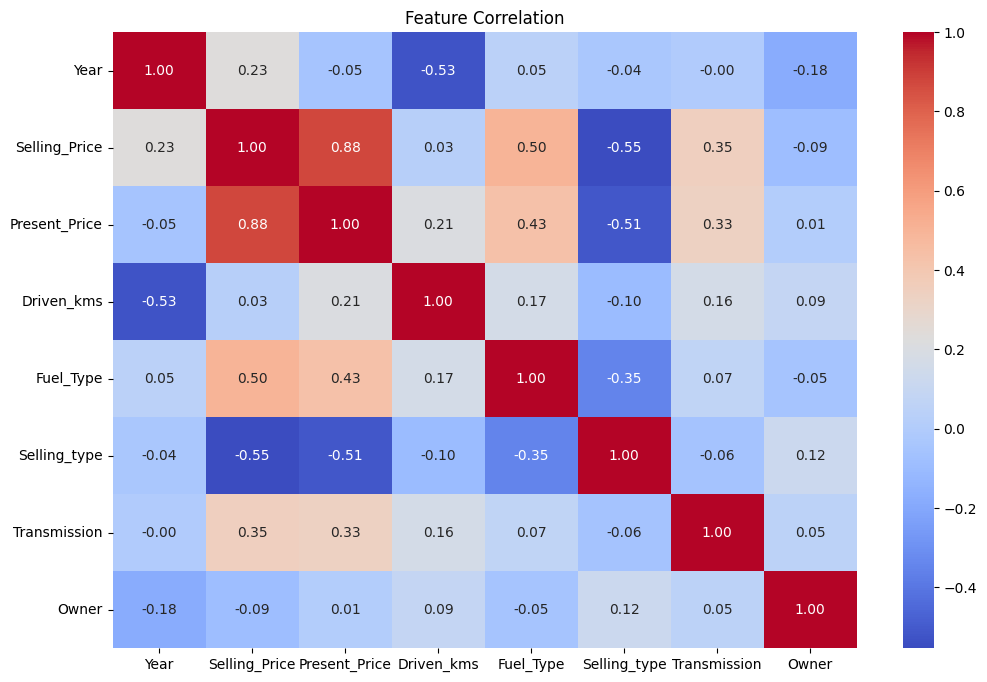

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Feature Correlation')
plt.show()

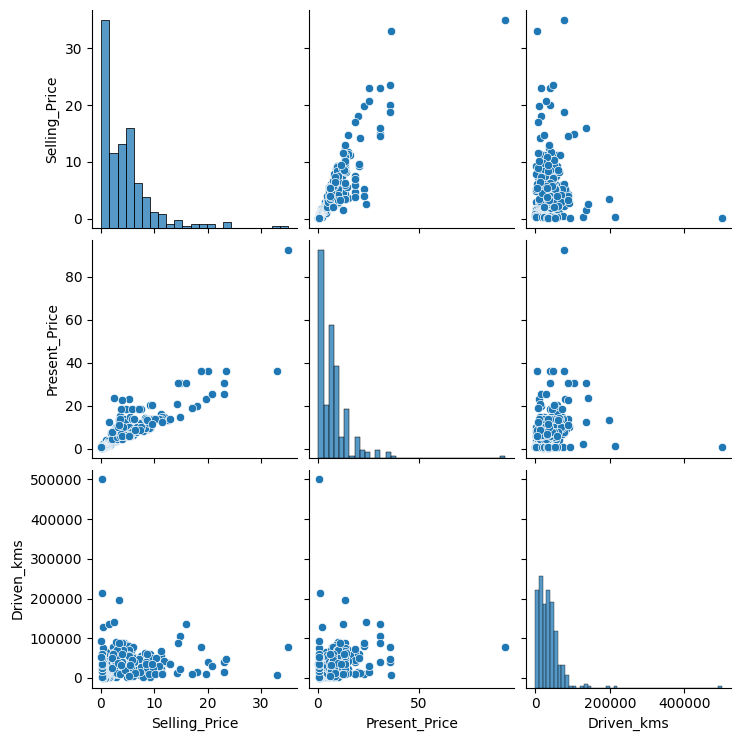

In [15]:
# Pairplot of numerical features
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms']])
plt.show()

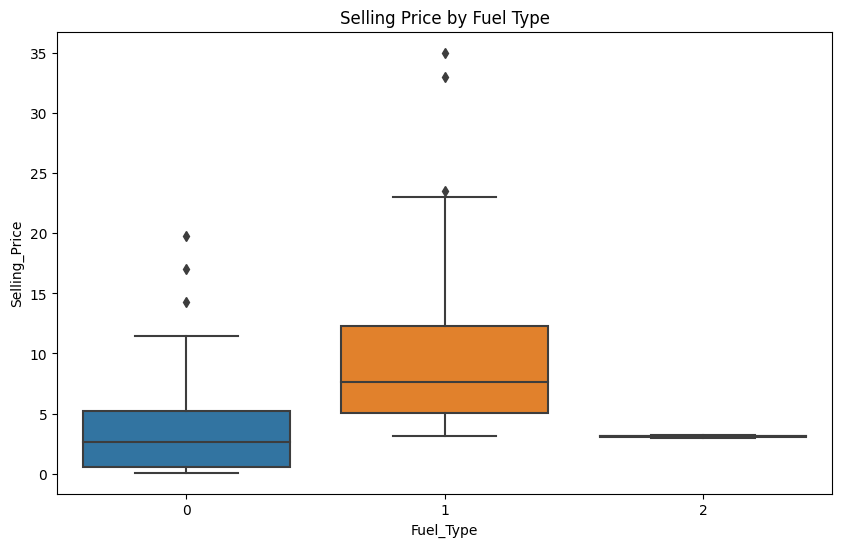

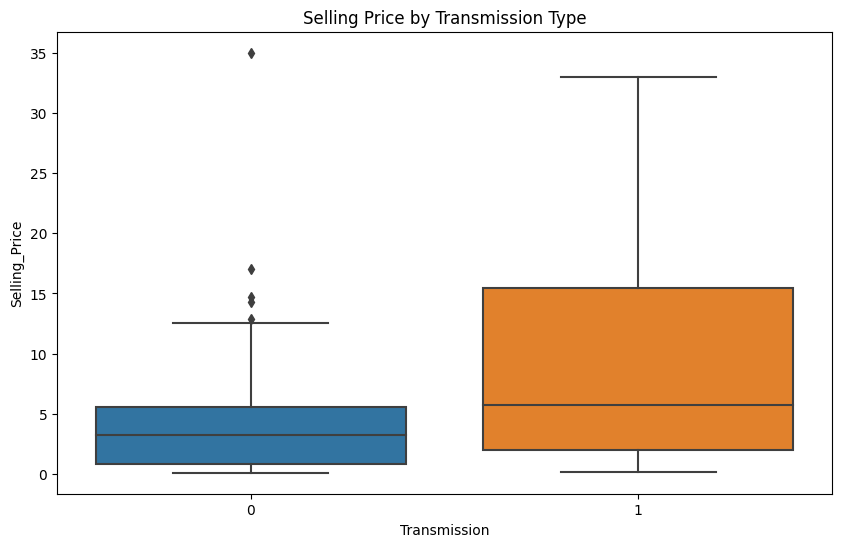

In [16]:
# Boxplots for categorical features
# Selling Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.show()

# Selling Price by Transmission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission Type')
plt.show()

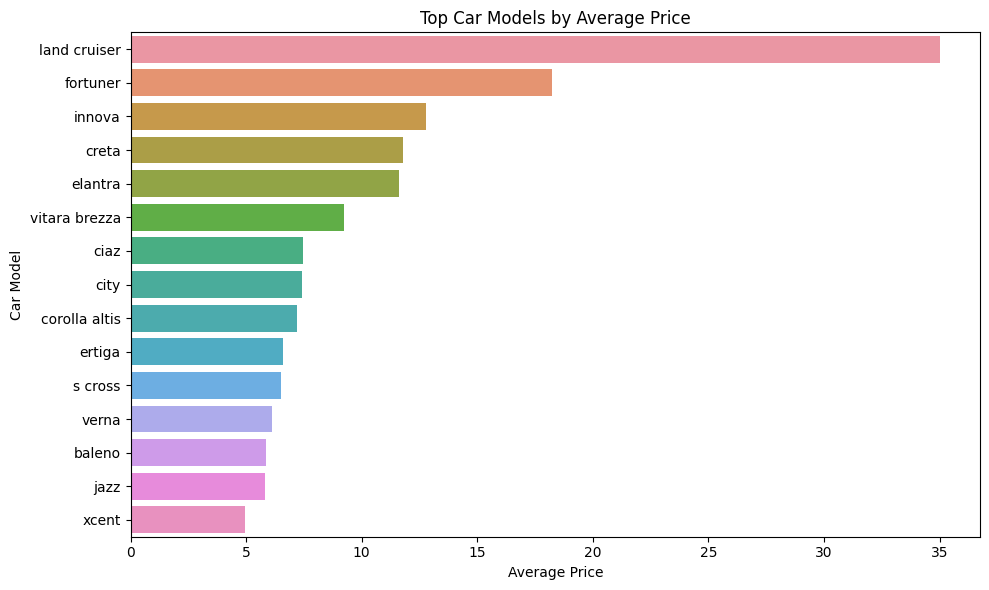

In [17]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top car models by average price
Top_car_models = avg_prices_by_car.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=Top_car_models.values, y=Top_car_models.index)
plt.title('Top Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


# Train the Model

In [18]:
# Splitting the dataset
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [20]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# model_1 traning
model_1 = DecisionTreeRegressor()
model_1.fit(X_train, y_train)

# Prediction
y_pred = model_1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2-squared (R^2):",r2)

Mean Squared Error (MSE): 2.5909383333333342
R^2-squared (R^2): 0.8832206559536542


In [22]:
from sklearn.ensemble import RandomForestRegressor

# model_2 training
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
# prediction
y_pred = model_2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2-squared:', r2)

Mean Squared Error: 1.8044586768333366
R^2-squared: 0.9186690405061742


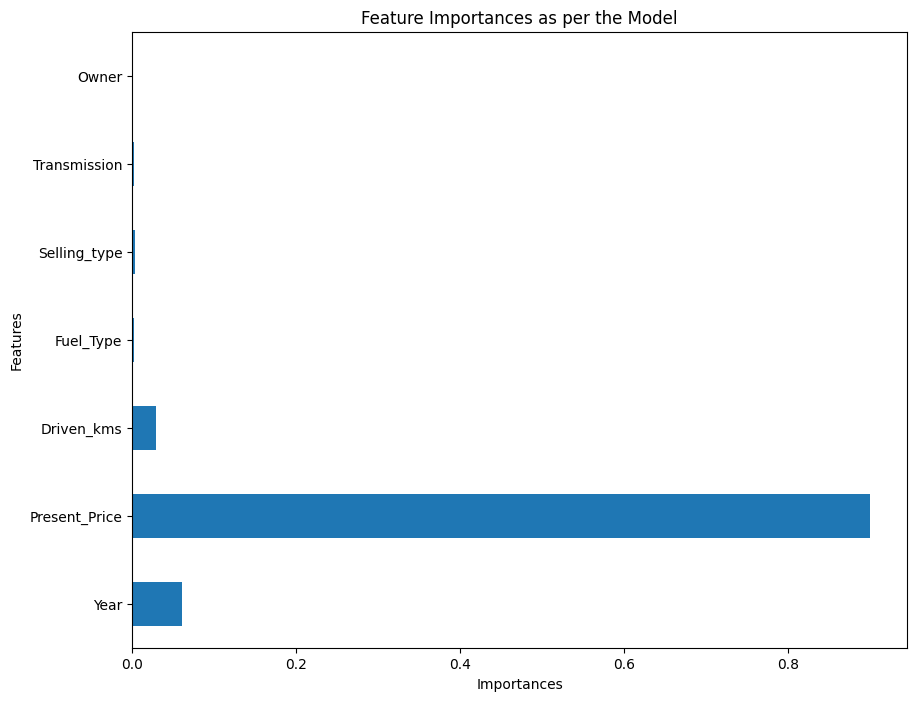

In [24]:
# Plot feature importance
feature_imps=pd.Series(model_2.feature_importances_,index=X.columns)
plt.figure(figsize=(10,8))
feature_imps.plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('Importances')
plt.title('Feature Importances as per the Model')
plt.show()

In [25]:
pred_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Price,Predicted Price,Difference
265,6.50,7.9615,-1.4615
120,1.05,0.8965,0.1535
199,0.12,0.1896,-0.0696
81,4.75,5.0600,-0.3100
31,2.35,2.8720,-0.5220
83,12.50,8.3005,4.1995
52,18.00,16.1200,1.8800
62,18.75,21.8650,-3.1150
59,19.99,24.2035,-4.2135
259,3.90,3.9400,-0.0400


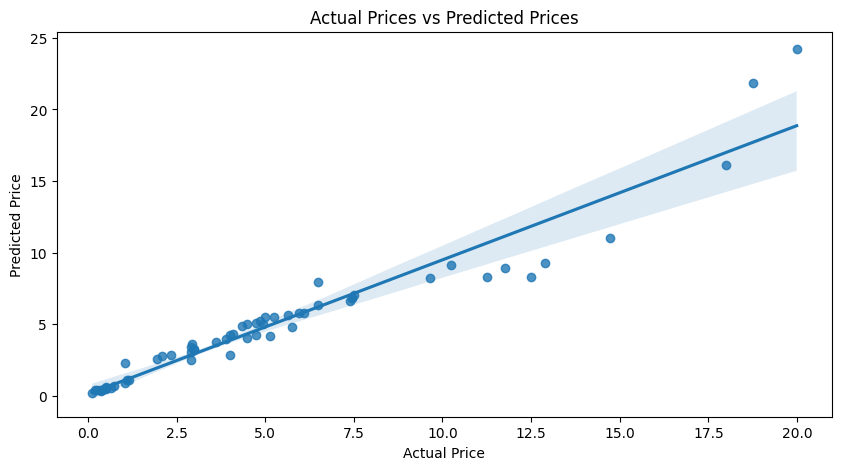

In [26]:
# Create plot
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

[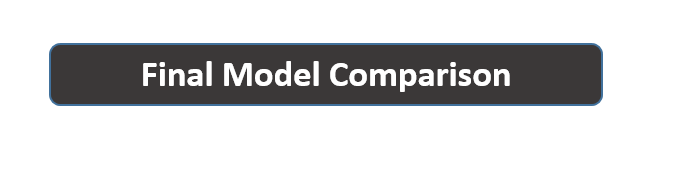](http://)

# Best Model
**Best model is Random Forest Regressor**

**- MSE: 1.58 (vs Decision Tree's 1.82) → More precise predictions**

**- R²: 92.8% (vs Decision Tree's 91.7%) → Better fit to data**

**More stable than single Decision Tree (reduces overfitting risk)**


# Conclusion
**Random Forest delivers the most accurate and reliable car price predictions. 🏆🚗**